In [ ]:
#From https://learnopencv.com/histogram-of-oriented-gradients/

In [ ]:
#upload  component_testing.jpg, 4_5_digits_crop.png

In [ ]:
#!pip install opencv-contrib-python==4.5.5.62 #install contrib modules version of recent opencv #only needed in first run

In [1]:
import cv2
import numpy as np

In [2]:
#this was created because Google Colab does not allow cv2.imshow, so must patch by cv2_imshow.
#If we switch over to regular jupyter notebook not on Colab, we can change c2_imshow to cv2.imshow.
from google.colab.patches import cv2_imshow #only used when running in Google Colab
def my_imshow(title, img ):
  print(title)
  cv2_imshow(img) #should be changed to c2.imshow when not in Colab

In [3]:
path = ""
fileName = path +  "4_5_digits_crop.png" #"component_testing.jpg" # "4_5_digits_crop.png" #
input_image = cv2.imread(fileName)

# Print error message if image is null
if input_image is None:
    print('Could not read image')
else:
    print("Image file read success...")

Image file read success...


Input Image:


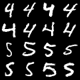

In [4]:
my_imshow("Input Image:", input_image)

Current Shape (Width, Height, Color Depth):  (80, 80, 3)
Resize to what width? 100
Resize to what height? 100
Resized Image:


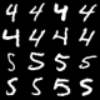

In [5]:

print("Current Shape (Width, Height, Color Depth): ", input_image.shape)

resize_width = input ("Resize to what width? ")
resize_height = input ("Resize to what height? ")

new_dimensions = (int(resize_width), int(resize_height))
resized_image = cv2.resize(input_image, new_dimensions)
my_imshow("Resized Image:", resized_image)

Gray Image Shape (Width, Height - no color depth):  (80, 80)
Gray Image:


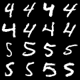

In [6]:
#convert image to grayscale
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
print("Gray Image Shape (Width, Height - no color depth): ", gray_image.shape)
my_imshow("Gray Image:", gray_image)

Threshold Value:  10.0
Threshold Image dark is black:


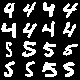

In [7]:
#Threshold the image into a binary image of black or white only (2 colors)
threshold = 10
threshold_value, threshold_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)
print ("Threshold Value: ", threshold_value)
my_imshow("Threshold Image dark is black:", threshold_image)

Threshold Image (inverted) dark is white:


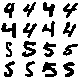

In [8]:
#Threshold the image into a binary image of black or white only (2 colors)
threshold = 10
threshold_value, threshold_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY_INV)
my_imshow("Threshold Image (inverted) dark is white:", threshold_image)

In [9]:
#DEMO IMAGE LABELING
path = ""
fileName = path +  "4_5_digits_crop.png" #"4_20x20.png"
input_image = cv2.imread(fileName)

# Print error message if image is null
if input_image is None:
    print('Could not read image')
else:
    print("Image file read success...")

Image file read success...


Input Image:


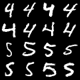

In [10]:
my_imshow("Input Image:", input_image)
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

Threshold Value:  30.0
Threshold Image dark is black:


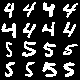

In [11]:
#Threshold the image into a binary image of black or white only (2 colors)
threshold = 30
threshold_value, threshold_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)
print ("Threshold Value: ", threshold_value)
my_imshow("Threshold Image dark is black:", threshold_image)

In [12]:
connectivity = 8
# Perform the operation
num_labels, labels_matrix, stats_matrix, centroids_matrix = cv2.connectedComponentsWithStats(threshold_image, connectivity)


In [13]:
print("num_labels: ", num_labels) #number of unique colors (incl. background)
print("labels: ", labels_matrix) #ouput colored image
print("shape of labels: ", labels_matrix.shape) #same as image shape
print("centroids: ", centroids_matrix)

num_labels:  17
labels:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
shape of labels:  (80, 80)
centroids:  [[39.40756136 39.47169438]
 [ 9.19736842  8.96052632]
 [29.02985075  8.55223881]
 [48.59574468  8.45744681]
 [69.26506024  8.92771084]
 [ 9.65384615 29.15384615]
 [28.6097561  29.1097561 ]
 [48.88461538 28.51282051]
 [68.82716049 28.7654321 ]
 [28.63157895 48.76315789]
 [ 8.44       48.82      ]
 [48.65168539 48.85393258]
 [68.68656716 49.10447761]
 [ 9.07894737 68.82894737]
 [28.86153846 68.92307692]
 [49.25806452 68.83870968]
 [68.59183673 68.78571429]]


In [14]:
print(cv2.CC_STAT_LEFT)# The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.
print(cv2.CC_STAT_TOP)# The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.
print(cv2.CC_STAT_WIDTH)# The width of the bounding box
print(cv2.CC_STAT_HEIGHT)# The height of the bounding box
print(cv2.CC_STAT_AREA)# The total area

print("stats: ", stats_matrix)# [i,j]
#i is label no
#j=0 to get left corner x
#j=1 for top corner y
#j=2 for width of bounding box
#j=3 for height of bounding box

0
1
2
3
4
stats:  [[   0    0   80   80 5052]
 [   4    3   10   15   76]
 [  23    2   13   15   67]
 [  43    2   12   15   94]
 [  63    3   15   15   83]
 [   1   23   15   15  104]
 [  23   23   13   15   82]
 [  42   22   13   14   78]
 [  63   22   13   15   81]
 [  22   41   14   16  114]
 [   6   42    6   15   50]
 [  43   42   13   15   89]
 [  63   44   15   11   67]
 [   5   62   10   15   76]
 [  25   62   10   15   65]
 [  42   62   15   15  124]
 [  63   62   12   15   98]]


stats[label, COLUMN] where available columns are defined below.

- cv2.CC_STAT_LEFT The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.

- cv2.CC_STAT_TOP The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.

- cv2.CC_STAT_WIDTH The horizontal size of the bounding box

- cv2.CC_STAT_HEIGHT The vertical size of the bounding box

- cv2.CC_STAT_AREA The total area (in pixels) of the connected component

Labeled Image*20 with 17 labels: 


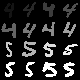

In [18]:
labels_matrix2 = 20*labels_matrix # 20*(labels_matrix+1)
my_imshow("Labeled Image*20 with "+ str(num_labels) + " labels: ", labels_matrix2)

Input Image:


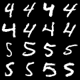

Bounding Box 1: 


Bounding Box 2: 


Bounding Box 3: 


Bounding Box 4: 


Bounding Box 5: 


Bounding Box 6: 


Bounding Box 7: 


Bounding Box 8: 


Bounding Box 9: 


Bounding Box 10: 


Bounding Box 11: 


Bounding Box 12: 


Bounding Box 13: 


Bounding Box 14: 


Bounding Box 15: 


Bounding Box 16: 


In [19]:
# num_labels, labels_matrix, stats_matrix, centroids_matrix = cv2.connectedComponentsWithStats(threshold_image, connectivity)
#print("stats: ", stats_matrix)# [i,j]
#i is label no
#j=0 to get left corner x
#j=1 for top corner y
#j=2 for width of bounding box
#j=3 for height of bounding box
# Loop through each component and show output image
my_imshow("Input Image:", gray_image)
for i in range(num_labels):
    # Area of the component
    area = stats_matrix[i, cv2.CC_STAT_AREA]

    if (area < 400):
        new_height = stats_matrix[i,3]
        new_width = stats_matrix[i,2]
        top_left_x = stats_matrix[i,0]
        top_left_y = stats_matrix[i,1]
        #print("new height, width: ", new_height, new_width)
        #print("top left y, x: ", top_left_x, top_left_y )
        output = np.zeros((new_height, new_width), dtype="uint8")
        for i2 in range(new_height):
          for j2 in range(new_width):
            output[i2,j2] = gray_image[i2+top_left_y, j2+top_left_x]
        my_imshow("Bounding Box "+ str(i) + ": ", output)

Equalized Image: 


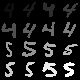

In [20]:
#labels_image_color = cv2.cvtColor(labels_matrix, cv2.COLOR_GRAY2BGR)
labels_matrix_8bitint = labels_matrix.astype(np.uint8)
equalized_image = cv2.equalizeHist(labels_matrix_8bitint)
my_imshow("Equalized Image: ", equalized_image)

Input Image and Labeled Image: 


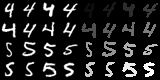

In [21]:
# stacking images side-by-side
horizontal_stacked_images = np.hstack((gray_image, equalized_image))

# show image input vs output
my_imshow("Input Image and Labeled Image: ", horizontal_stacked_images)

Otsu's method determines an optimal global threshold value from the image histogram.


In order to do so, the cv.threshold() function is used, where cv.THRESH_OTSU is passed as an extra flag. The threshold value can be chosen arbitrary. The algorithm then finds the optimal threshold value which is returned as the first output.

Threshold Value:  106.0
Threshold Image dark is black:


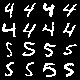

In [22]:
# Otsu's thresholding. An Auto thresholding method.
threshold_value, threshold_image1 = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print ("Threshold Value: ", threshold_value)
my_imshow("Threshold Image dark is black:", threshold_image1)